# EDA project of Forbes 2022 dataset

The Forbes Billionaires dataset is a rich source of information for analyzing the wealth of the world's richest people. With data spanning over several years, this dataset provides an opportunity to explore trends in the global wealth distribution and uncover insights into the factors that contribute to billionaires' success. In this project, we used Python's powerful data analysis libraries, including Pandas, NumPy, and Seaborn, to perform exploratory data analysis (EDA) on the Forbes Billionaires dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
forbes_df = pd.read_csv('forbes_2022_billionaires.csv')

In [26]:
forbes_df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [27]:
forbes_df.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings
count,2668.000000,2582.000000,2668.000000,2668.0,2668.0,396.000000,127.000000
mean,1302.919040,64.210689,4762.350075,2022.0,4.0,1.856061,2.732283
std,747.807782,13.401258,10540.482258,0.0,0.0,0.971486,1.891706
min,1.000000,19.000000,1000.000000,2022.0,4.0,1.000000,1.000000
25%,665.000000,55.000000,1500.000000,2022.0,4.0,1.000000,2.000000
50%,1292.000000,64.000000,2400.000000,2022.0,4.0,2.000000,2.000000
75%,1929.000000,74.000000,4300.000000,2022.0,4.0,2.000000,3.000000
max,2578.000000,100.000000,219000.000000,2022.0,4.0,5.000000,14.000000


In [28]:
forbes_df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

### Checking the finalWorth column

In [29]:
#finalWorth is in missing some zero's

forbes_df.finalWorth

0       219000.0
1       171000.0
2       158000.0
3       129000.0
4       118000.0
          ...   
2663      1000.0
2664      1000.0
2665      1000.0
2666      1000.0
2667      1000.0
Name: finalWorth, Length: 2668, dtype: float64

In [32]:
#Adjusting the final worth to billions

forbes_df.finalWorth = forbes_df.finalWorth /1000
forbes_df.finalWorth

0       219.0
1       171.0
2       158.0
3       129.0
4       118.0
        ...  
2663      1.0
2664      1.0
2665      1.0
2666      1.0
2667      1.0
Name: finalWorth, Length: 2668, dtype: float64

### Checking for missing values

In [72]:
forbes_df.isnull().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

## Exploring the data

### Who are the Top 10 richest in the world?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15304\1501306009.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=forbes_df['personName'][:11], rotation=90)


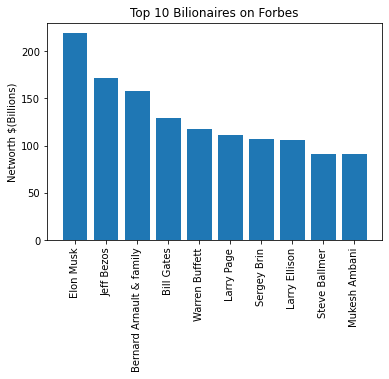

In [36]:
fig,ax=plt.subplots()
ax.bar(forbes_df['personName'][:10], forbes_df['finalWorth'][:10])
ax.set_title('Top 10 Bilionaires on Forbes')
ax.set_ylabel('Networth $(Billions)')
ax.set_xticklabels(labels=forbes_df['personName'][:11], rotation=90)
plt.show()


### Checking the countries with most billionaires

In [73]:
forbes_df.groupby('country').size()

country
Algeria                   1
Andorra                   1
Argentina                 6
Australia                41
Austria                  12
                       ... 
United Arab Emirates     10
United Kingdom           85
United States           748
Uruguay                   3
Vietnam                   7
Length: 73, dtype: int64

In [74]:
country_counts = forbes_df.groupby('country').size()

In [75]:
country_counts = country_counts.to_frame()

In [76]:
country_counts

,0
country,
Algeria,1
Andorra,1
Argentina,6
Australia,41
Austria,12
...,...
United Arab Emirates,10
United Kingdom,85
United States,748


In [46]:
country_counts = country_counts.rename(columns={0:'Count'})
country_counts

,Count
country,
Algeria,1
Andorra,1
Argentina,6
Australia,41
Austria,12
...,...
United Arab Emirates,10
United Kingdom,85
United States,748


In [48]:
country_counts=country_counts.sort_values(by='Count', ascending=False)
country_counts

,Count
country,
United States,748
China,571
India,159
Germany,112
United Kingdom,85
...,...
Andorra,1
Liechtenstein,1
Nepal,1


### Which industry has the most billionaires in it

In [77]:
forbes_df['category'].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [52]:
industry_counts = forbes_df.groupby('category').size()

In [53]:
industry_counts = industry_counts.to_frame()
industry_counts = industry_counts.rename(columns={0:'Count'})
industry_counts=industry_counts.sort_values(by='Count', ascending=False)
industry_counts

,Count
category,
Finance & Investments,392
Technology,343
Manufacturing,337
Fashion & Retail,250
Healthcare,217
Food & Beverage,203
Real Estate,193
Diversified,180
Media & Entertainment,99


In [54]:
# As we can see, despite most of the top 10 billionaires are from the Tech industry, most of them work in the finance field

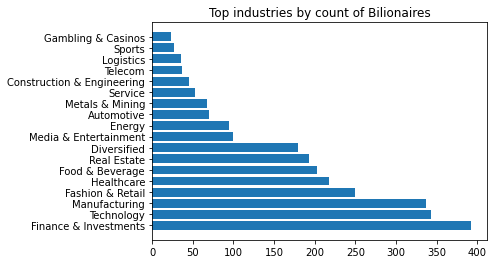

In [61]:
fig,ax4=plt.subplots()
ax4.barh(industry_counts.index, industry_counts['Count'])
ax4.set_title('Top industries by count of Bilionaires')
plt.show()

# Money and age relationship

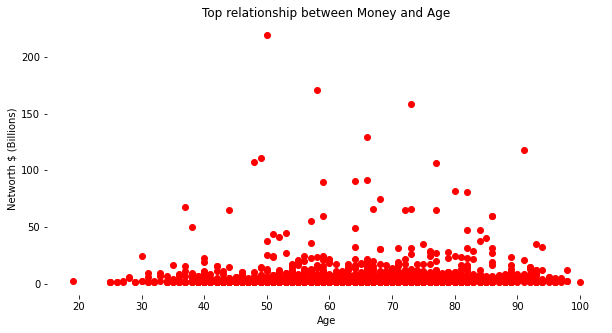

In [78]:
fig,ax5=plt.subplots(figsize=(10,5))
ax5.scatter(forbes_df['age'],forbes_df['finalWorth'], color='red')
[s.set_visible(False) for s in ax5.spines.values()]
ax5.set_title('Top relationship between Money and Age')
ax5.set_xlabel('Age')
ax5.set_ylabel('Networth $ (Billions)')
plt.show()

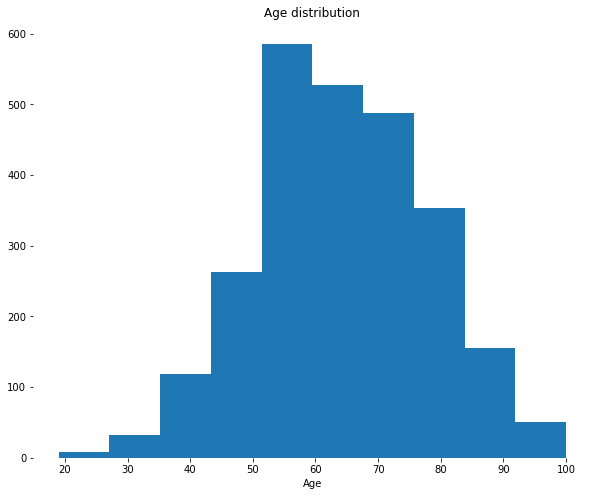

In [71]:
fig,ax6=plt.subplots(figsize=(10,8))
ax6.hist(forbes_df['age'])
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Age distribution')
ax6.set_xlabel('Age')
plt.show()